# Modelling - ARIMA, SARIMAX

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from math import sqrt
from pmdarima import auto_arima

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
raw_data = pd.read_csv('assets/total_data.csv')
raw_data.head()

,month,mean_temp,rainfall,dengue_cases
0,2012-01-01,26.7,106.1,338
1,2012-02-01,27.2,83.6,258
2,2012-03-01,27.0,313.4,231
3,2012-04-01,27.6,260.6,363
4,2012-05-01,28.2,292.0,338


## Adding first order differences

In [72]:
raw_data['dengue_cases_first_diff'] = raw_data['dengue_cases'].diff()

In [73]:
raw_data.isnull().sum()

month                      0
mean_temp                  0
rainfall                   0
dengue_cases               0
dengue_cases_first_diff    1
dtype: int64

In [74]:
raw_data.dropna(inplace=True)

In [75]:
raw_data.head()

,month,mean_temp,rainfall,dengue_cases,dengue_cases_first_diff
1,2012-02-01,27.2,83.6,258,-80.0
2,2012-03-01,27.0,313.4,231,-27.0
3,2012-04-01,27.6,260.6,363,132.0
4,2012-05-01,28.2,292.0,338,-25.0
5,2012-06-01,28.7,53.0,468,130.0


## Checking for stationarity

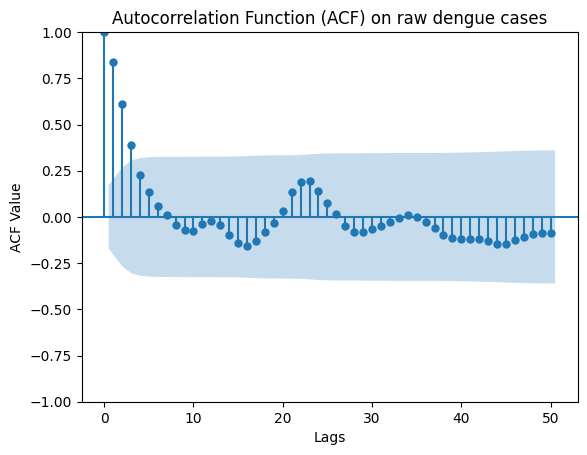

In [76]:
plot_acf(raw_data['dengue_cases'], lags=50)
plt.title("Autocorrelation Function (ACF) on raw dengue cases")
plt.xlabel("Lags")
plt.ylabel("ACF Value")
plt.show()

In [77]:
result = adfuller(raw_data['dengue_cases'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.465297
p-value: 0.000227


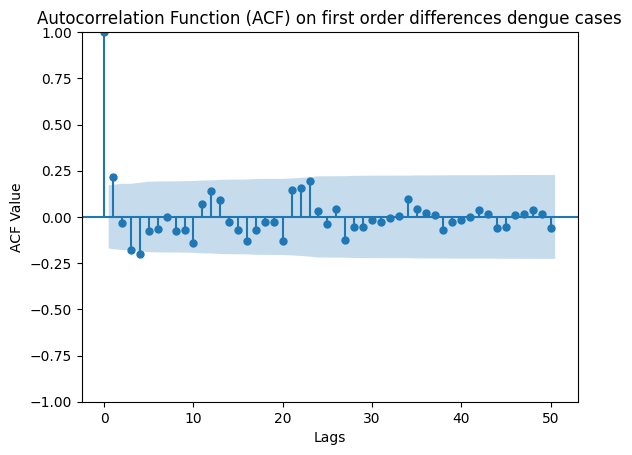

In [78]:
plot_acf(raw_data['dengue_cases_first_diff'], lags=50)
plt.title("Autocorrelation Function (ACF) on first order differences dengue cases")
plt.xlabel("Lags")
plt.ylabel("ACF Value")
plt.show()

In [79]:
result = adfuller(raw_data['dengue_cases_first_diff'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -7.017932
p-value: 0.000000


c:\Users\Clara\anaconda3\envs\dsi-sg\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


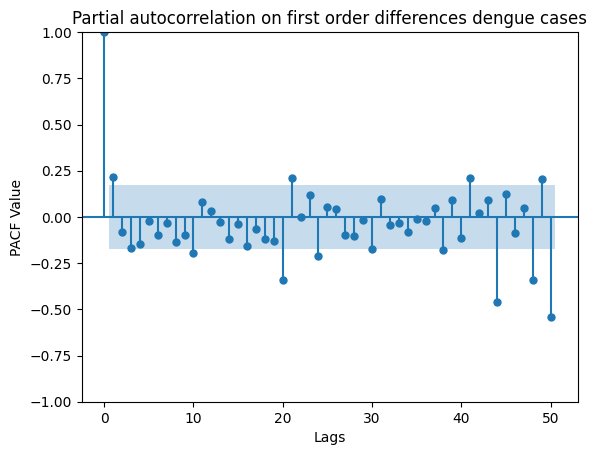

In [80]:
plot_pacf(raw_data['dengue_cases_first_diff'], lags=50)
plt.title("Partial autocorrelation on first order differences dengue cases")
plt.xlabel("Lags")
plt.ylabel("PACF Value")
plt.show()

## ARIMA model

In [81]:
train_size = int(len(raw_data) * 0.8)
train_data = raw_data.iloc[:train_size]
test_data = raw_data.iloc[train_size:]

In [82]:
auto_arima_model = auto_arima(train_data["dengue_cases"], d=1, seasonal=True, stepwise=True,
                              suppress_warnings=True, error_action="ignore", max_p=6,
                              max_order=None, trace=True)

print(auto_arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1623.918, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1639.453, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1638.756, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1637.680, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1637.605, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1630.875, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1624.414, Time=0.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1625.195, Time=0.12 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1623.852, Time=0.21 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1628.383, Time=0.21 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1623.939, Time=0.36 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1625.300, Time=0.36 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=1

In [83]:
model = ARIMA(train_data["dengue_cases"], order=auto_arima_model.order)
model_fit = model.fit()
print(model_fit.summary())

c:\Users\Clara\anaconda3\envs\dsi-sg\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Clara\anaconda3\envs\dsi-sg\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Clara\anaconda3\envs\dsi-sg\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           dengue_cases   No. Observations:                  104
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -805.418
Date:                Sat, 18 May 2024   AIC                           1622.836
Time:                        10:23:54   BIC                           1638.644
Sample:                             0   HQIC                          1629.239
                                - 104                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0371      0.194      5.354      0.000       0.657       1.417
ar.L2         -0.9353      0.149     -6.287      0.000      -1.227      -0.644
ma.L1         -0.8863      0.247     -3.588      0.0

c:\Users\Clara\anaconda3\envs\dsi-sg\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [84]:
predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1], typ='levels')

c:\Users\Clara\anaconda3\envs\dsi-sg\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [85]:
rmse = sqrt(mean_squared_error(test_data['dengue_cases'], predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2764.127


In [86]:
test_data['predictions'] = predictions

C:\Users\Clara\AppData\Local\Temp\ipykernel_13704\1726354805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predictions'] = predictions


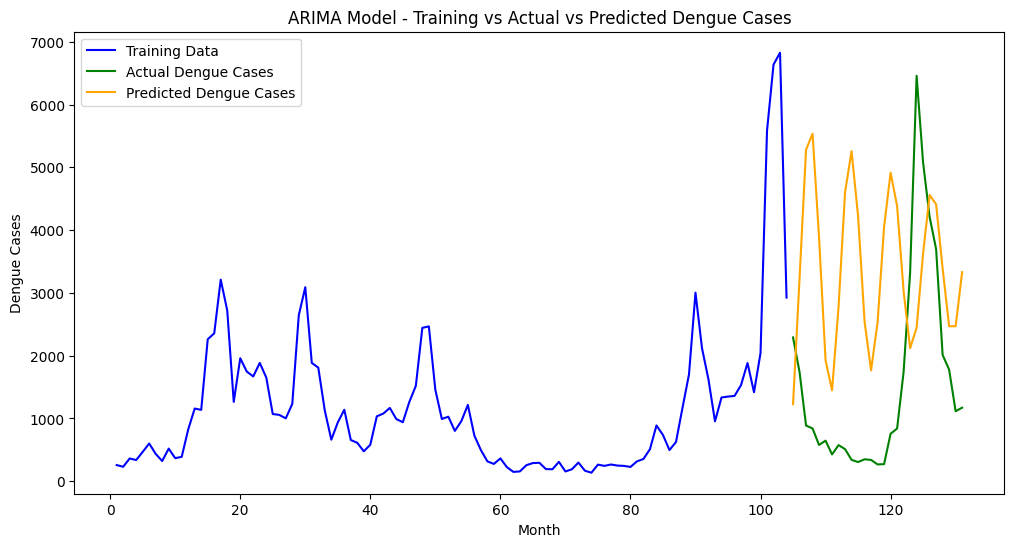

In [87]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['dengue_cases'], label='Training Data', color='blue')
plt.plot(test_data.index, test_data['dengue_cases'], label='Actual Dengue Cases', color='green')
plt.plot(test_data.index, test_data['predictions'], label='Predicted Dengue Cases', color='orange')
plt.xlabel('Month')
plt.ylabel('Dengue Cases')
plt.title('ARIMA Model - Training vs Actual vs Predicted Dengue Cases')
plt.legend()
plt.show()

## SARIMA

In [95]:
# Use auto_arima to find the best SARIMA parameters on the training set
auto_arima_model = auto_arima(
    train_data['dengue_cases'],
    d=1,
    seasonal=True,
    m=12,  #assume 12 month seasonality
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)
print(auto_arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1625.193, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1639.453, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1633.948, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1632.984, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1637.605, Time=0.00 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1623.652, Time=0.50 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1623.918, Time=0.08 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=1625.014, Time=1.07 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=1624.049, Time=0.52 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=1.44 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=1623.596, Time=0.40 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=1624.414, Time=0.17 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=1625.464, Time=0.48 sec
 ARIMA(2,1,1)(0,0,2)[12] inte

In [96]:
order = auto_arima_model.order
seasonal_order = auto_arima_model.seasonal_order
model = SARIMAX(train_data['dengue_cases'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                         dengue_cases   No. Observations:                  104
Model:             SARIMAX(4, 1, 0)x(0, 0, [1], 12)   Log Likelihood                -803.684
Date:                              Sat, 18 May 2024   AIC                           1619.368
Time:                                      10:28:16   BIC                           1635.176
Sample:                                           0   HQIC                          1625.771
                                              - 104                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0983      0.137      0.719      0.472      -0.170       0.366
ar.L2         -0.07

c:\Users\Clara\anaconda3\envs\dsi-sg\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Clara\anaconda3\envs\dsi-sg\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [97]:
# Make predictions on the test set
predictions = model_fit.get_forecast(steps=len(test_data))
predicted_mean = predictions.predicted_mean
confidence_intervals = predictions.conf_int()

# Create a new date range for the forecast period
forecast_dates = test_data.index

# Add predictions to the test_data dataframe
test_data['predictions'] = predicted_mean

c:\Users\Clara\anaconda3\envs\dsi-sg\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Clara\AppData\Local\Temp\ipykernel_13704\1038729807.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predictions'] = predicted_mean


In [98]:
test_data.dropna(inplace=True)

C:\Users\Clara\AppData\Local\Temp\ipykernel_13704\1732420335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.dropna(inplace=True)


In [99]:
rmse = sqrt(mean_squared_error(test_data['dengue_cases'], test_data['predictions']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2919.399


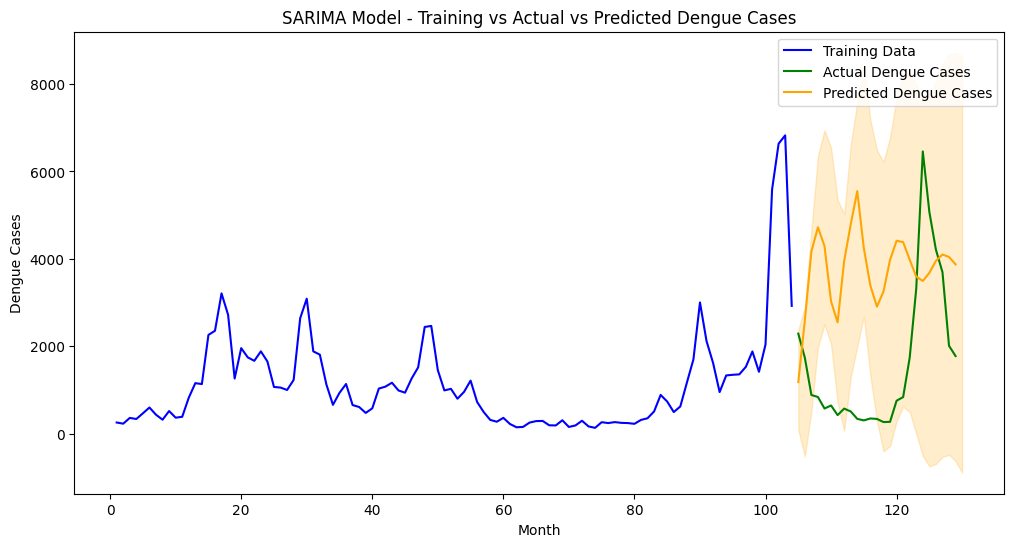

In [100]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['dengue_cases'], label='Training Data', color='blue')
plt.plot(test_data.index, test_data['dengue_cases'], label='Actual Dengue Cases', color='green')
plt.plot(test_data.index, test_data['predictions'], label='Predicted Dengue Cases', color='orange')
plt.fill_between(forecast_dates, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='orange', alpha=0.2)
plt.xlabel('Month')
plt.ylabel('Dengue Cases')
plt.title('SARIMA Model - Training vs Actual vs Predicted Dengue Cases')
plt.legend()
plt.show()